<h2>Installing packages</h2>

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

Cloning into 'yolov5'...
remote: Enumerating objects: 6260, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 6260 (delta 24), reused 18 (delta 10), pack-reused 6206
Receiving objects: 100% (6260/6260), 8.48 MiB | 31.24 MiB/s, done.
Resolving deltas: 100% (4282/4282), done.
/content/yolov5
     |████████████████████████████████| 645kB 9.1MB/s 


In [3]:
import torch
from IPython.display import Image, clear_output

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.8.1+cu101 (Tesla T4)


In [4]:
!curl -L "https://public.roboflow.com/ds/3ThufLIRRm?key=WrrJWpSpjc" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   897  100   897    0     0   1682      0 --:--:-- --:--:-- --:--:--  1679
100 16.8M  100 16.8M    0     0  18.8M      0 --:--:-- --:--:-- --:--:-- 18.8M
Archive:  roboflow.zip
replace README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
 extracting: test/images/0b47311f426ff926578c9d738d683e76_jpg.rf.40183eae584a653181bbd795ba3c353f.jpg  
 extracting: test/images/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.f02cd668d26a53d9bf001497992b3657.jpg  
 extracting: test/images/2f6fb003bb89cd401322a535acb42f65_jpg.rf.66c0a46773a9cd583fb96c3df41a9e0c.jpg  
 extracting: test/images/410993714e325a1de3e394ffe860df3a_jpg.rf.657c49ca295ef54da23469189070a075.jpg  
 extracting: test/images/4e3117459d759798537eb52cf5bf534d_jpg.r

In [5]:
# Weights & Biases  (optional)
%pip install -q wandb
import wandb
wandb.login()

     |████████████████████████████████| 1.8MB 9.6MB/s 
     |████████████████████████████████| 102kB 14.0MB/s 
     |████████████████████████████████| 163kB 34.6MB/s 
     |████████████████████████████████| 133kB 34.1MB/s 
     |████████████████████████████████| 71kB 11.4MB/s 


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [10]:
!python train.py --img 416 --batch 80 --epochs 100 --data data.yaml --cfg yolov5s.yaml

github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-81-gabfcf9e torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=80, bbox_interval=-1, bucket='', cache_images=False, cfg='./models/yolov5s.yaml', data='data.yaml', device='', entity=None, epochs=100, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[416, 416], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp3', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=80, upload_dataset=False, weights='yolov5s.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2021-05-10 16:40:13.337682: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfu

In [12]:
!python test.py --img 640 --batch 80 --data data.yaml --weights runs/train/exp3/weights/best.pt

Namespace(augment=False, batch_size=80, conf_thres=0.001, data='data.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.6, name='exp', project='runs/test', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=False, task='val', verbose=False, weights=['runs/train/exp3/weights/best.pt'])
YOLOv5 🚀 v5.0-81-gabfcf9e torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7086274 parameters, 0 gradients, 16.4 GFLOPS
val: Scanning 'valid/labels.cache' images and labels... 58 found, 0 missing, 0 empty, 0 corrupted: 100% 58/58 [00:00<00:00, 549141.38it/s]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100% 1/1 [00:02<00:00,  2.46s/it]
                 all          58         386       0.951       0.983       0.984       0.709
        black-bishop          58          22           1       0.864        0.96       0.565
          black-king          58          29       0.768  

In [8]:
%load_ext tensorboard
%tensorboard --logdir runs/train

Launching TensorBoard...

KeyboardInterrupt: ignored

In [18]:
!python detect.py --img 600 --conf 0.25 --source test/images --weights runs/train/exp3/weights/best.pt

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=600, iou_thres=0.45, line_thickness=3, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='test/images', update=False, view_img=False, weights=['runs/train/exp3/weights/best.pt'])
YOLOv5 🚀 v5.0-81-gabfcf9e torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7086274 parameters, 0 gradients, 16.4 GFLOPS
image 1/29 /content/yolov5/test/images/0b47311f426ff926578c9d738d683e76_jpg.rf.40183eae584a653181bbd795ba3c353f.jpg: 608x608 1 white-king, 1 white-queen, Done. (0.011s)
image 2/29 /content/yolov5/test/images/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.f02cd668d26a53d9bf001497992b3657.jpg: 608x608 1 white-rook, Done. (0.011s)
image 3/29 /content/yolov5/test/images/2f6fb003bb89cd401322a535acb42f65_jpg.rf.66c0a46773a9cd583fb96c3df41a9e0c.jpg: 608x608 2 bl

In [ ]:
Image(filename='/content/yolov5/runs/train/exp2/train_batch0.jpg', width=900)

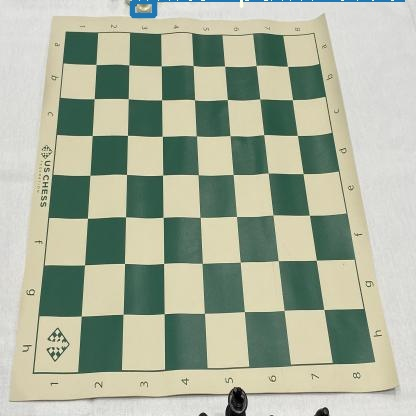

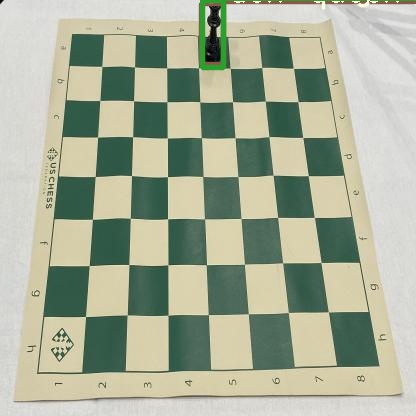

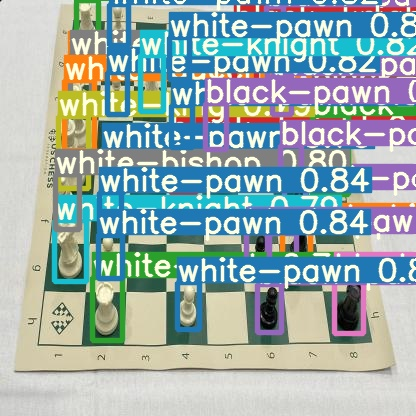

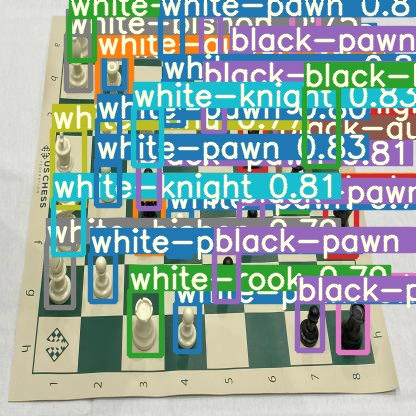

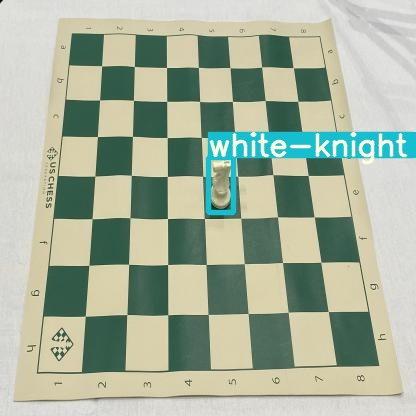

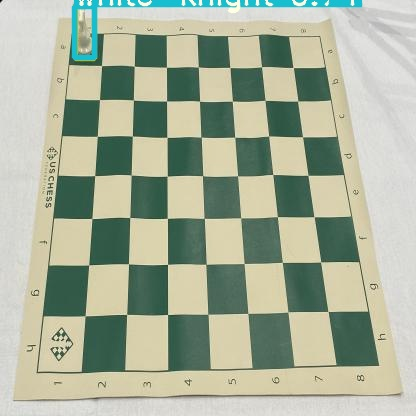

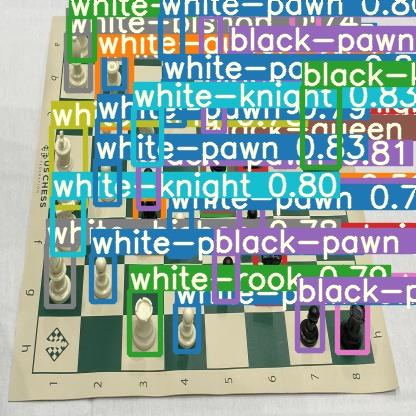

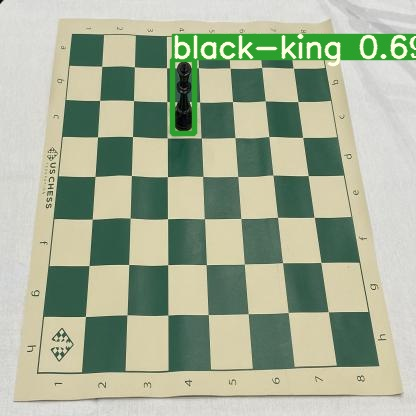

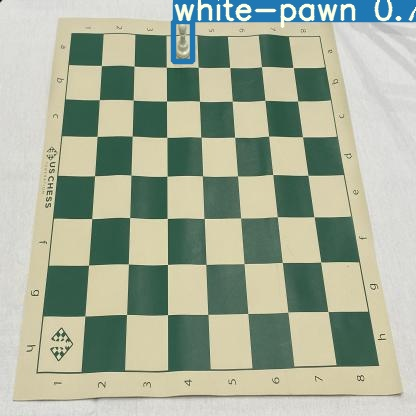

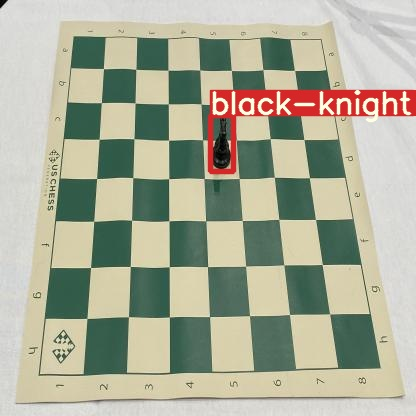

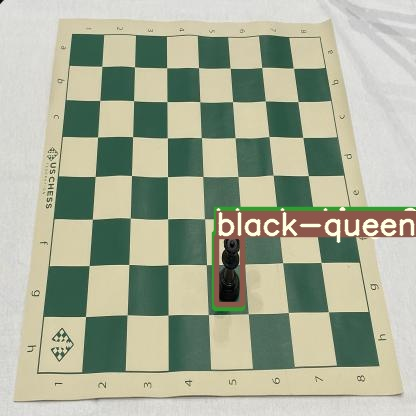

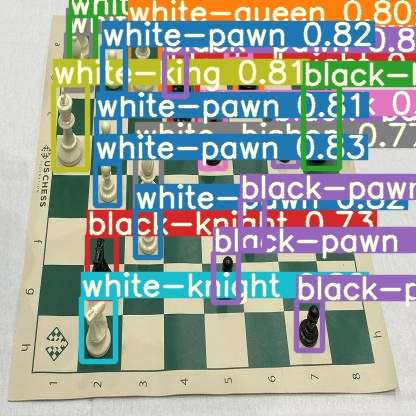

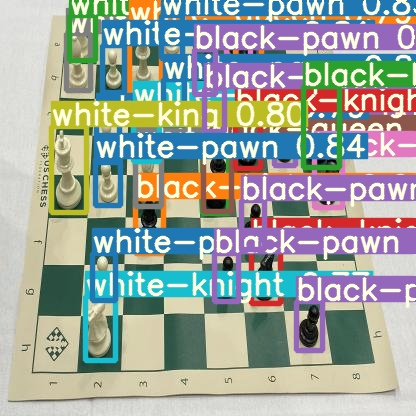

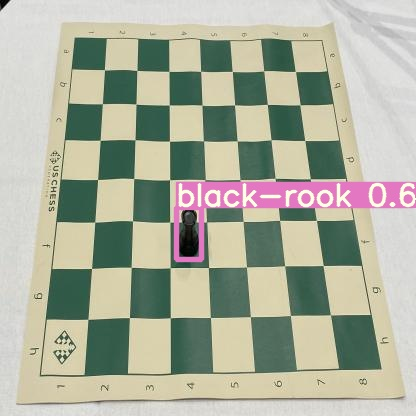

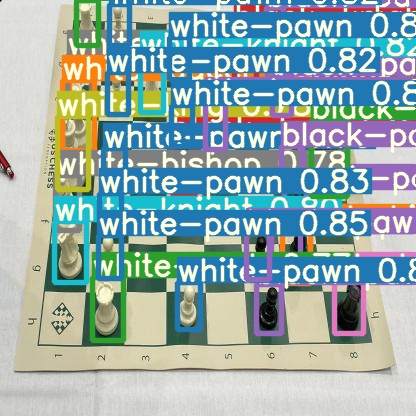

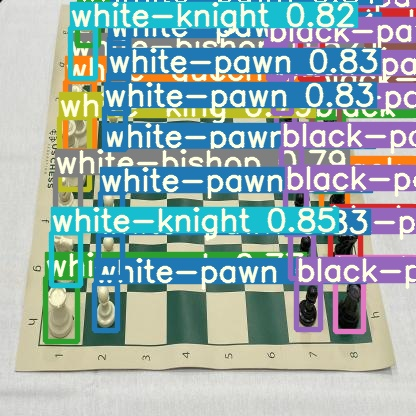

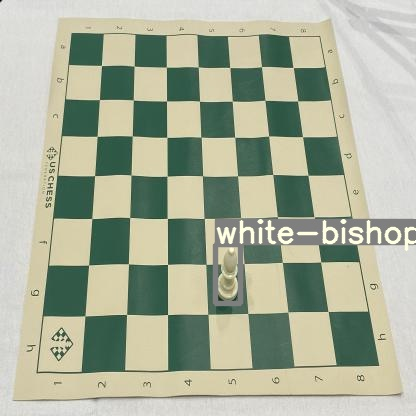

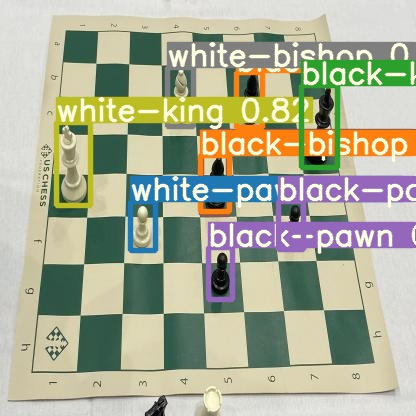

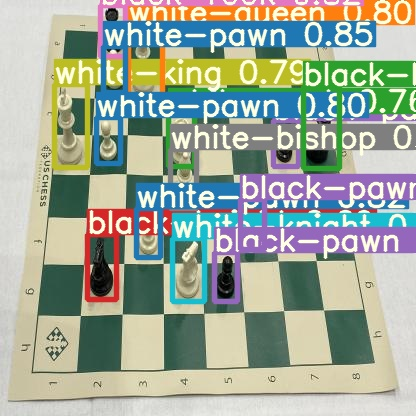

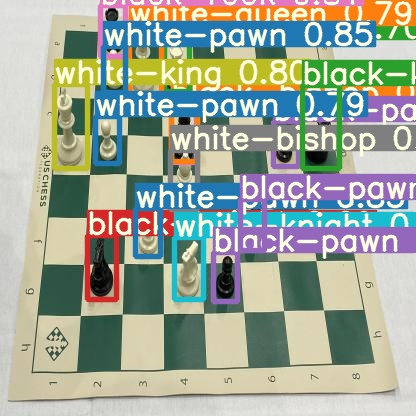

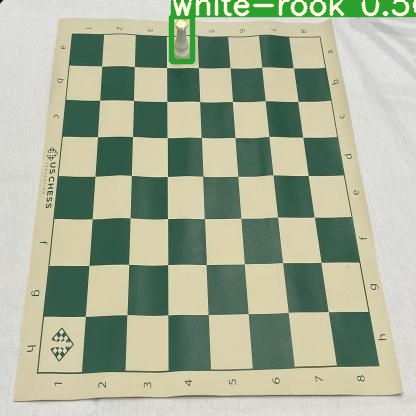

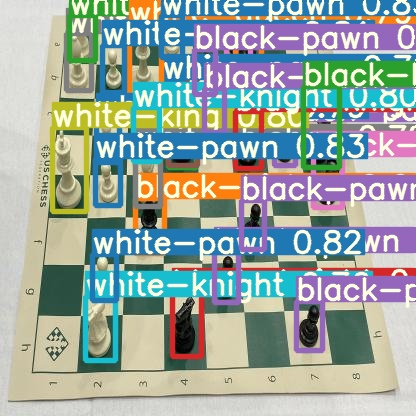

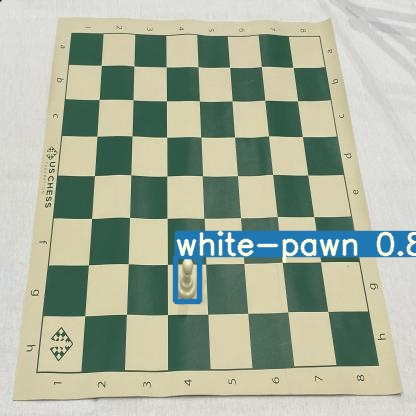

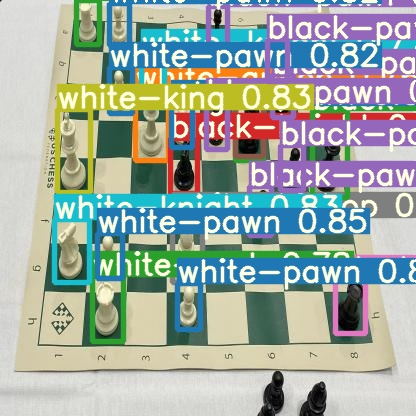

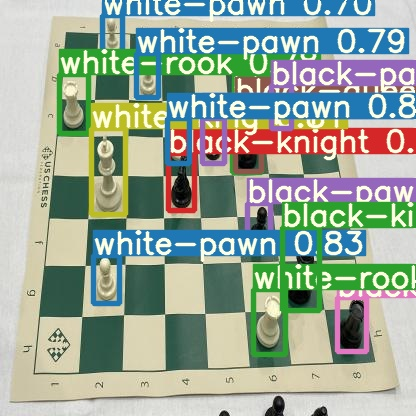

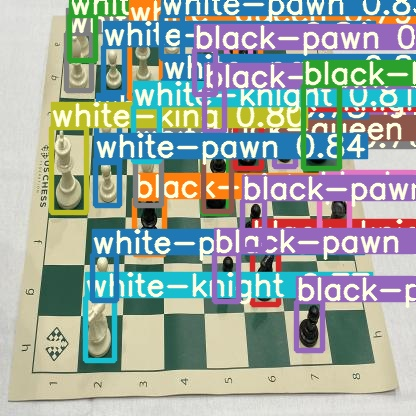

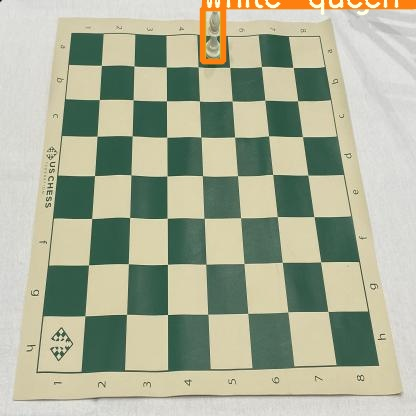

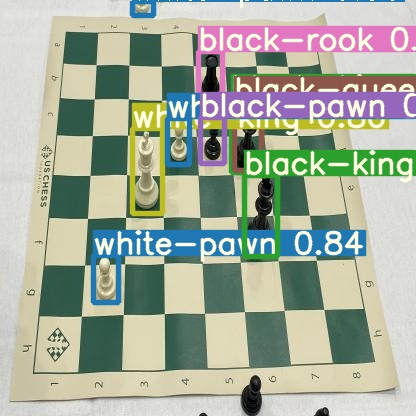

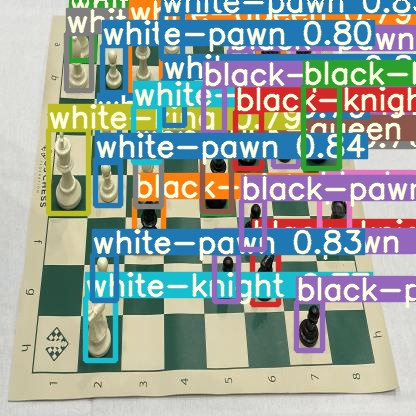

In [25]:
import glob
import sys
from IPython.display import Image, display


for imageName in glob.glob('/content/yolov5/runs/detect/exp2/*.jpg'):
  display(Image(filename=imageName))